<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/data-analysis/DIABETES_MODEL_DiabetesPredictionTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [496]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [497]:
# Importing the dataset

df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/Diabetes-Detection-Model/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


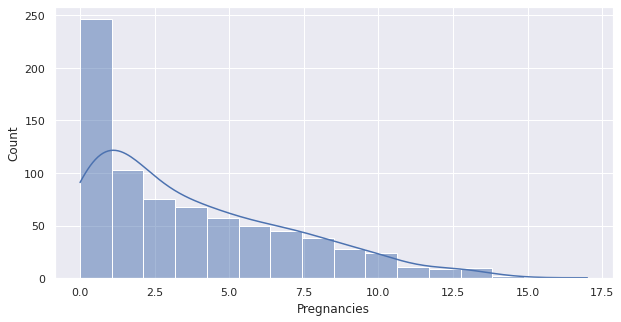

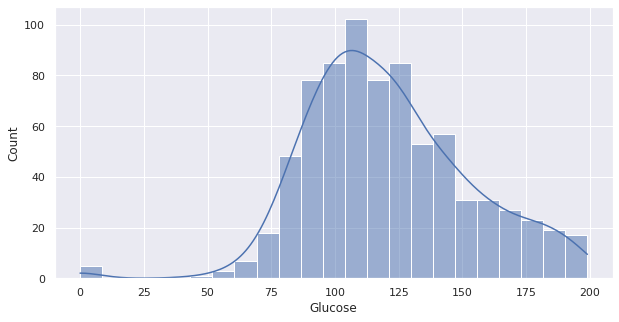

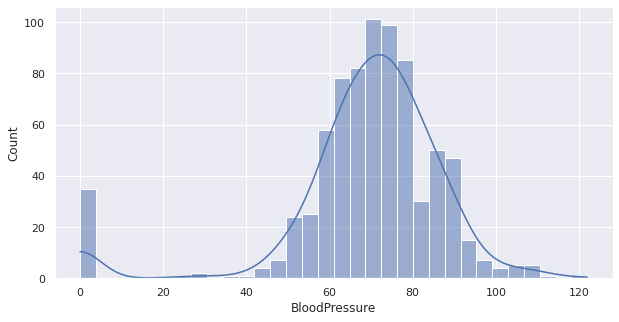

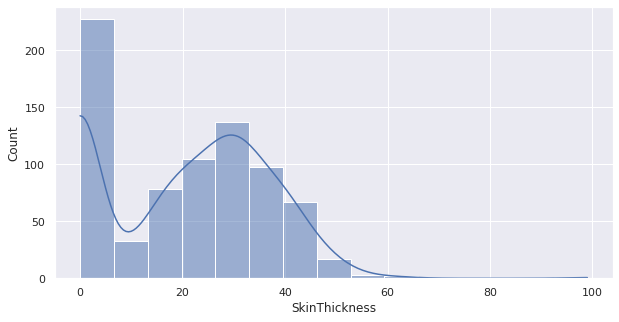

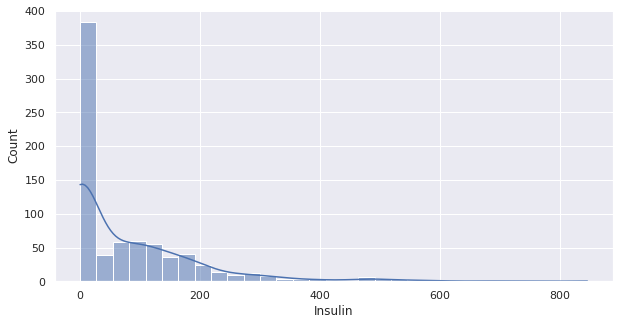

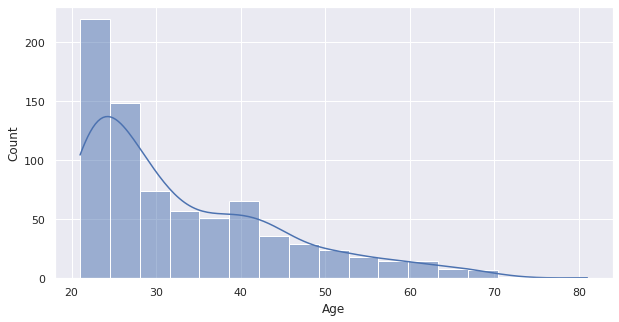

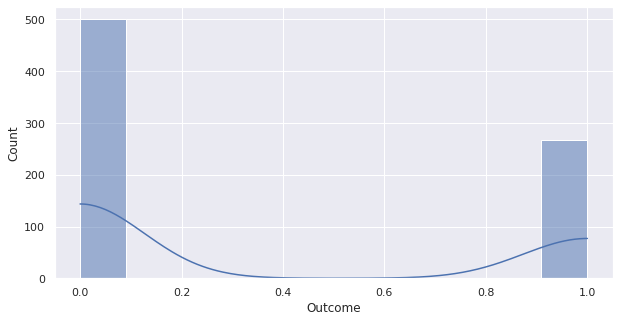

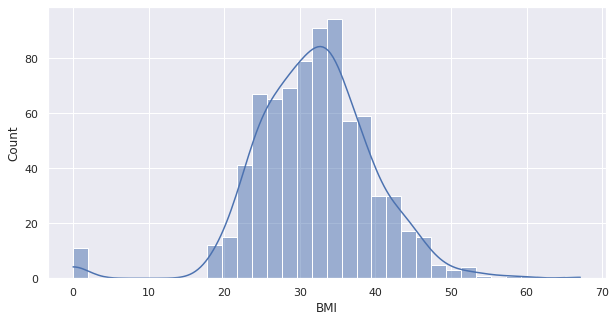

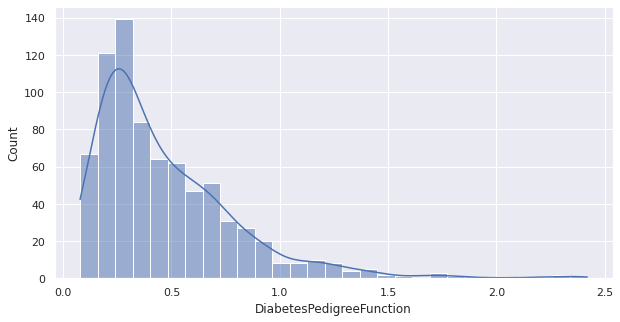

In [499]:
# Historgram representation of the numeric values

numList = df.select_dtypes(include=['int64']).columns.tolist()

fList = df.select_dtypes(include=['float64']).columns.tolist()

for n in numList:
  plt.figure(figsize=(10,5))
  sns.set_theme()
  sns.histplot(x=df[n], label=[n], kde=True)

for f in fList:
  plt.figure(figsize=(10,5))
  sns.set_theme()
  sns.histplot(x=df[f], label=[f], kde=True)
  

In [500]:

# skewness along the index axis
df.skew(axis = 0, skipna = True)

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [501]:
# Handling columns with zeroes

features = df.columns
cols = (df[features] == 0).sum()
print(cols)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [502]:
# Replacing zeroes with NaN except for no. of pregnancies

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [503]:
#Replace the null values with the median of that column:

df['Glucose'].fillna(df['Glucose'].median(), inplace =True)

df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace =True)

df['BMI'].fillna(df['BMI'].median(), inplace =True)

# df['Insulin'].fillna(df['Insulin'].median(), inplace =True)

# df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace =True)


In [504]:
by_Glucose_Age_Insulin_Grp = df.groupby(['Glucose'])

def fill_Insulin(series):
    return series.fillna(series.median())
df['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/p

In [505]:
by_BMI_Insulin = df.groupby(['BMI'])

def fill_Skinthickness(series):
    return series.fillna(series.mean())

df['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)
df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace= True)

In [506]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

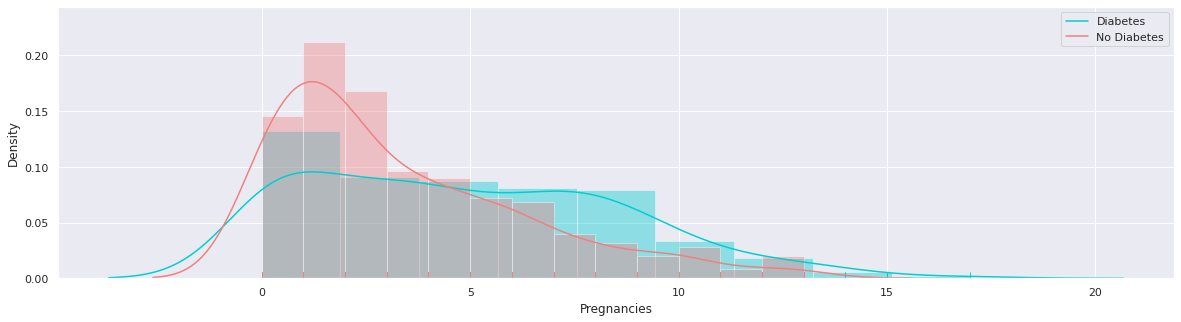

In [507]:
plt.figure(figsize=(20,5))
ax = sns.distplot(df['Pregnancies'][df.Outcome == 1], color ="darkturquoise", rug = True)
sns.distplot(df['Pregnancies'][df.Outcome == 0], color ="lightcoral",rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

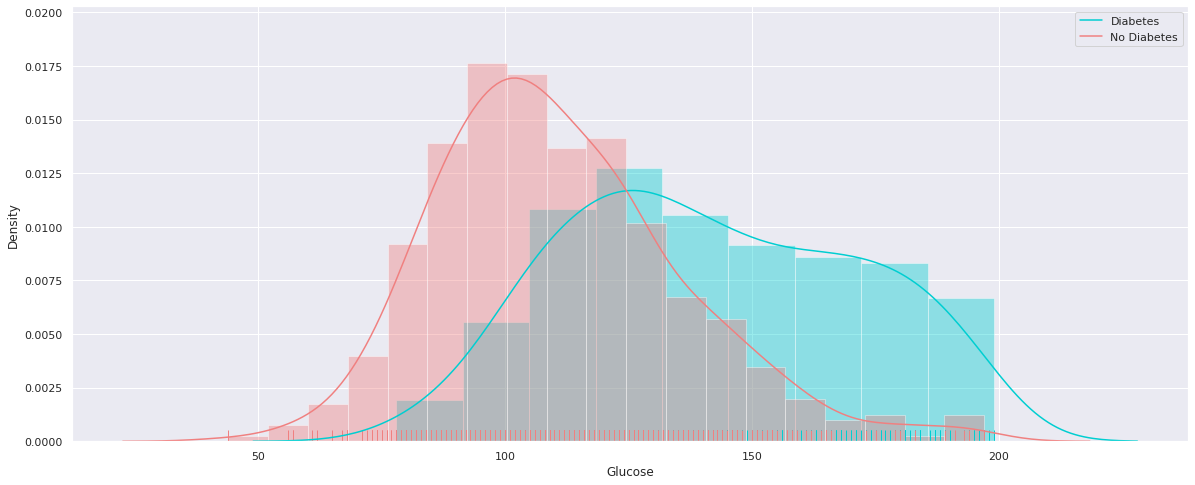

In [508]:
plt.figure(figsize=(20,8))
ax = sns.distplot(df['Glucose'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['Glucose'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

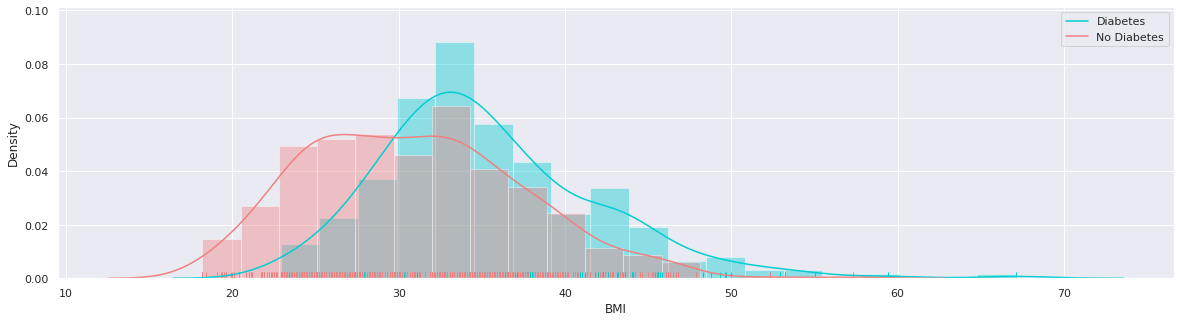

In [509]:
plt.figure(figsize=(20,5))
ax = sns.distplot(df['BMI'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['BMI'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

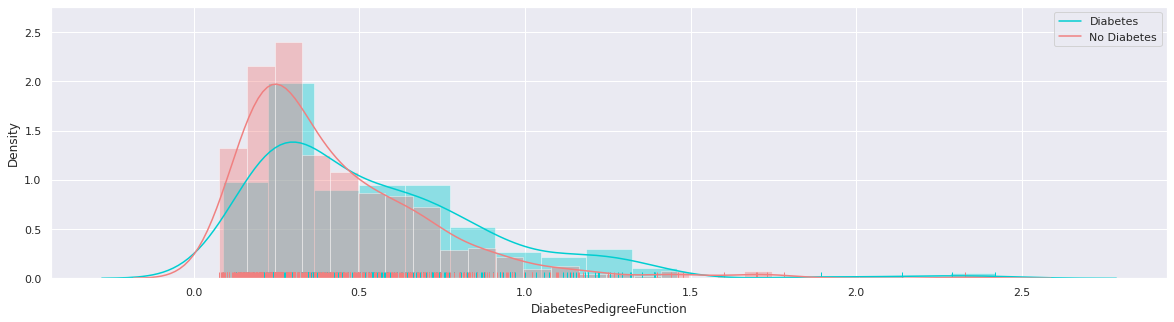

In [510]:
plt.figure(figsize=(20,5))
ax = sns.distplot(df['DiabetesPedigreeFunction'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['DiabetesPedigreeFunction'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

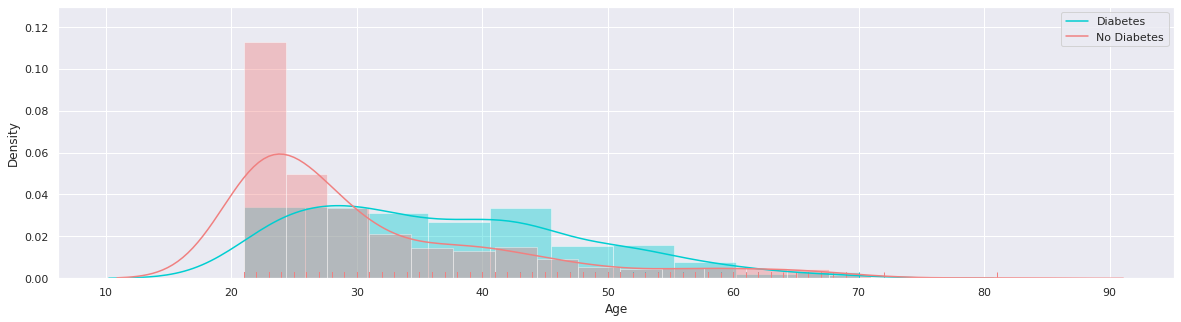

In [511]:
plt.figure(figsize=(20,5))
ax = sns.distplot(df['Age'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['Age'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

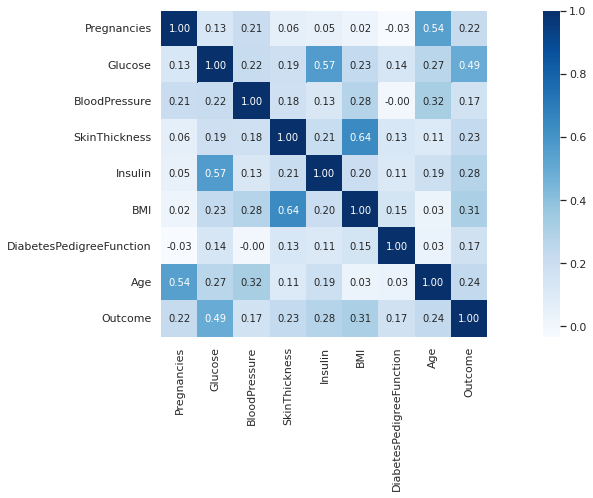

In [512]:
diabCorr = df.corr()
plt.figure(figsize=(20,6))
sns.heatmap(diabCorr, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Blues')

In [513]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [514]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)


In [515]:
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [516]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Selection

# Creating model objects

log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')
nm_model = MLPClassifier(hidden_layer_sizes=(128,128))
nv_bayes = GaussianNB()
d_tree = DecisionTreeClassifier()
k_nearest = KNeighborsClassifier()


In [517]:
models = [log_model, svm_model, nv_bayes, d_tree, k_nearest]
print("Training Data")
for m in models:
  print("\n",m.fit(x_train, y_train))
  print(m.score(x_train, y_train))


Training Data

 LogisticRegression()
0.7638436482084691

 SVC()
0.8192182410423453

 GaussianNB()
0.749185667752443

 DecisionTreeClassifier()
1.0

 KNeighborsClassifier()
0.7964169381107492


In [518]:
models = [log_model, svm_model, nv_bayes, d_tree, k_nearest]
print("Test Data")
for m in models:
  print("\n",m.fit(x_test, y_test))
  print(m.score(x_test, y_test))


Test Data

 LogisticRegression()
0.8181818181818182

 SVC()
0.8896103896103896

 GaussianNB()
0.8116883116883117

 DecisionTreeClassifier()
1.0

 KNeighborsClassifier()
0.8766233766233766


In [519]:
for m in models:
  print('\n\n', m)
  Y_pred = m.predict(x_test)
  print(classification_report(y_test,Y_pred))



 LogisticRegression()
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



 SVC()
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       107
           1       0.83      0.81      0.82        47

    accuracy                           0.89       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.89      0.89      0.89       154



 GaussianNB()
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       107
           1       0.71      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81  

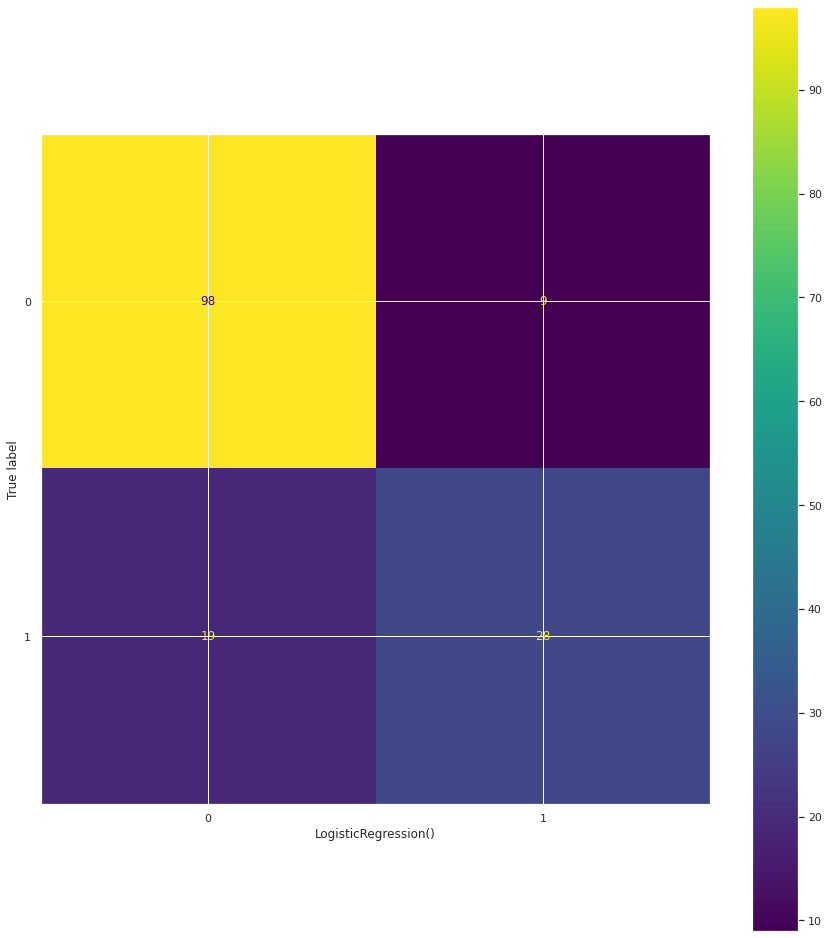

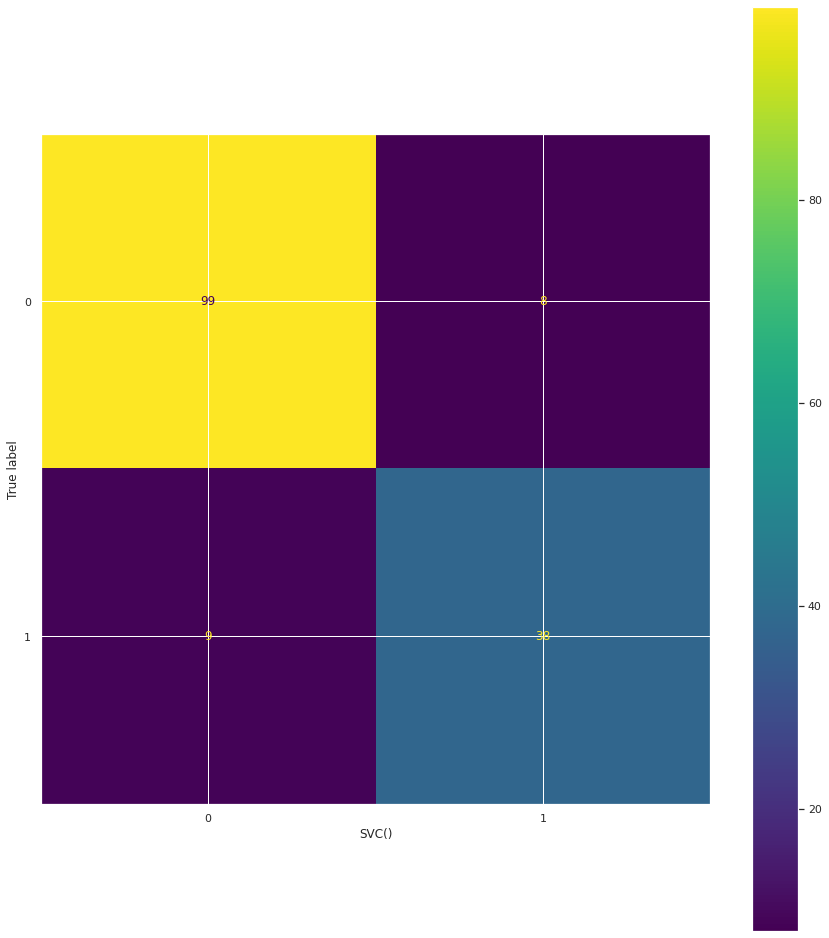

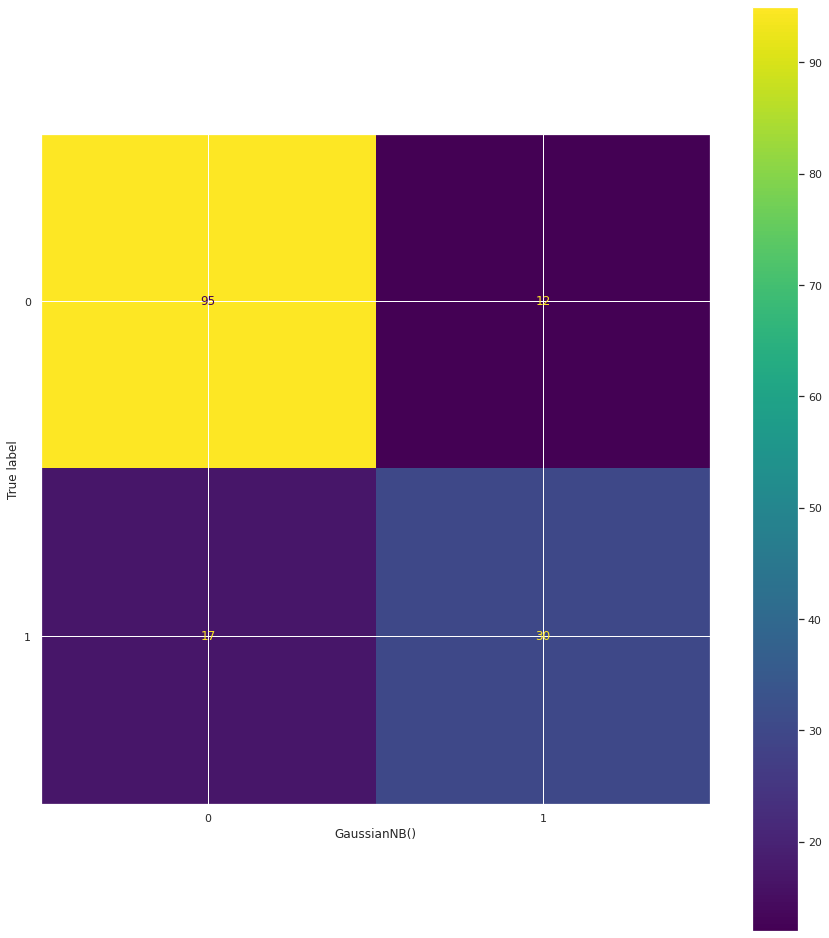

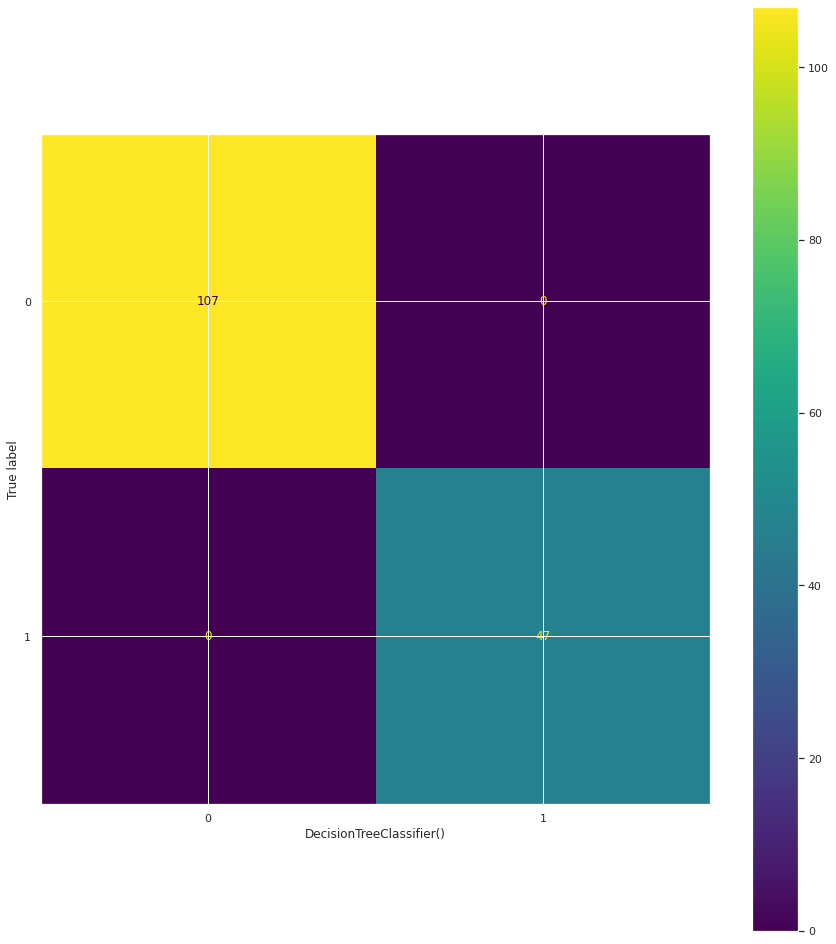

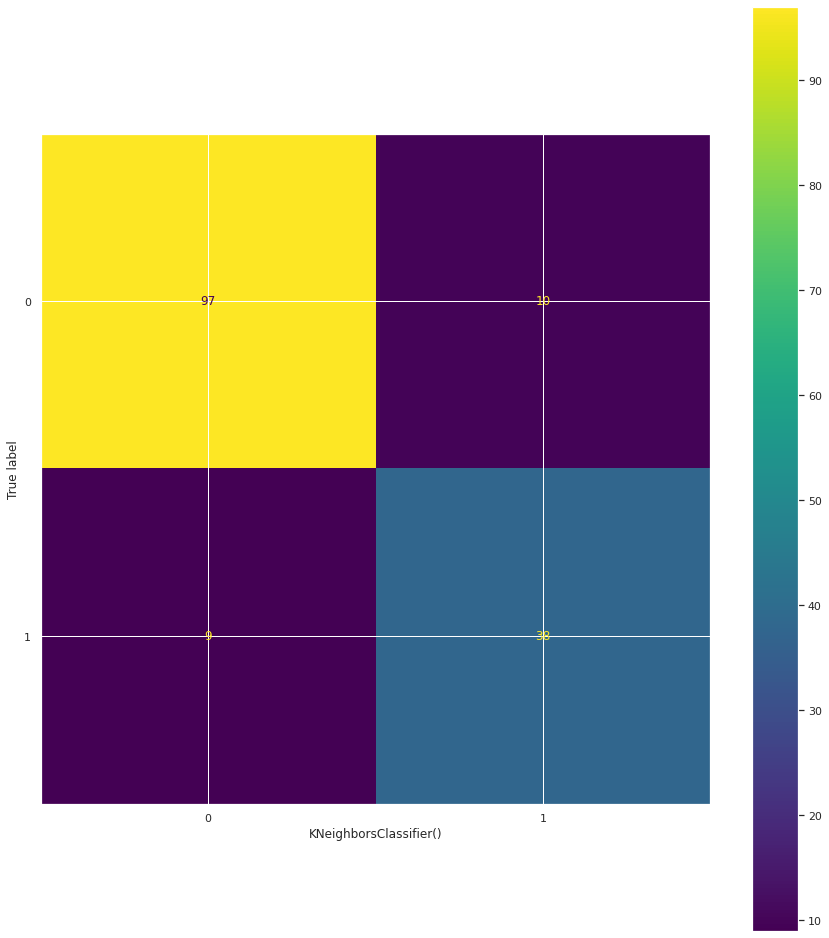

In [522]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for m in models:
  predictions = m.predict(x_test)
  cm = confusion_matrix(y_test, predictions, labels=m.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                      display_labels=m.classes_)
  disp.plot()
  plt.xlabel(m)
  plt.show()




